In [32]:
import sys
sys.path.append('..')
from sbap.sdf import ChemblSdfReader

import pathlib

import pandas as pd
import numpy as np
from tdc import Evaluator
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

from rdkit import Chem
from rdkit.Chem import MACCSkeys

In [37]:
SDF_FILE = "../molecules/CYP2C9_IC50_CHEMBL_data.sdf"

In [38]:
reader = ChemblSdfReader()
molecules = reader.parse(pathlib.Path(SDF_FILE))
print(f'read {len(molecules)} molecules')
print(molecules[0]['mol'])
print(molecules[0]['standardValue'])

read 5319 molecules

Mrv2114 03112311472D          

 28 31  0  0  0  0            999 V2000
    2.8579   -4.1250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8579   -4.9500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1434   -5.3625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1434   -6.1875    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
    2.8579   -6.6000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8579   -7.4250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1434   -7.8375    0.0000 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.1434   -8.6625    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.8579   -9.0750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8579   -9.9000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1434  -10.3125    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -9.9000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -9.0750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0 

In [39]:
X = []
y = []

for record in molecules:
    mol = Chem.MolFromMolBlock(record['mol'])
    X.append(MACCSkeys.GenMACCSKeys(mol).ToBitString())
    y.append(np.log10(record['standardValue']))
X = np.array([np.fromstring(s,'u1') - ord('0') for s in X])
y = np.array(y, dtype='f')

In [50]:
rmse = Evaluator(name = 'RMSE')
mae = Evaluator(name = 'MAE')
r_squared = Evaluator(name = 'R2')

def test_model(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(x_train, y_train)
    
    fig, ax = plt.subplots()
    ax.axline((0, 0), slope=1)

    predictions = model.predict(x_train)  
    rmse_score = rmse(y_train, predictions)
    mae_score = mae(y_train, predictions)
    r2_score = r_squared(y_train, predictions)
    print(f'on train set: RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')
    plt.scatter(y_train, predictions)

    predictions = model.predict(x_test) 
    rmse_score = rmse(y_test, predictions)
    mae_score = mae(y_test, predictions)
    r2_score = r_squared(y_test, predictions)
    print(f'on test set: RMSE, MAE, R2 = {rmse_score}, {mae_score}, {r2_score}')
    plt.scatter(y_test, predictions)
    plt.show()

## model = RandomForestRegressor(n_estimators=200, max_depth=20)
test_model(model)

on train set: RMSE, MAE, R2 = 0.6463524156883914, 0.47413543366771893, 0.2061796081131142
on test set: RMSE, MAE, R2 = 0.7168745957074224, 0.5172984592679947, 0.07618670505882108


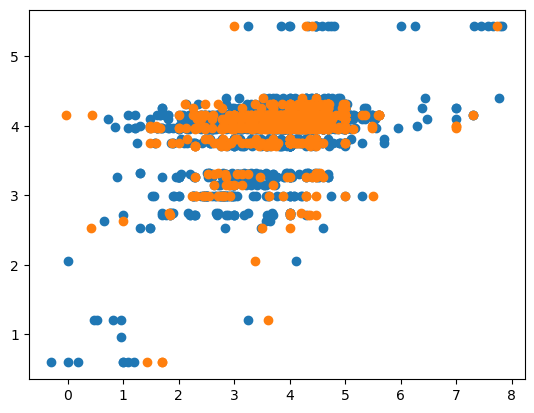

[Text(0.5661764705882353, 0.9545454545454546, 'x[59] <= 0.5\nsquared_error = 0.526\nsamples = 4255\nvalue = 3.999'),
 Text(0.29411764705882354, 0.8636363636363636, 'x[135] <= 0.5\nsquared_error = 0.476\nsamples = 3517\nvalue = 4.058'),
 Text(0.14705882352941177, 0.7727272727272727, 'x[137] <= 0.5\nsquared_error = 0.448\nsamples = 1740\nvalue = 4.136'),
 Text(0.08823529411764706, 0.6818181818181818, 'x[105] <= 0.5\nsquared_error = 0.769\nsamples = 265\nvalue = 4.304'),
 Text(0.058823529411764705, 0.5909090909090909, 'x[99] <= 0.5\nsquared_error = 0.821\nsamples = 200\nvalue = 4.402'),
 Text(0.029411764705882353, 0.5, 'squared_error = 0.441\nsamples = 153\nvalue = 4.261'),
 Text(0.08823529411764706, 0.5, 'x[126] <= 0.5\nsquared_error = 1.782\nsamples = 47\nvalue = 4.861'),
 Text(0.058823529411764705, 0.4090909090909091, 'squared_error = 2.286\nsamples = 21\nvalue = 5.429'),
 Text(0.11764705882352941, 0.4090909090909091, 'squared_error = 0.904\nsamples = 26\nvalue = 4.402'),
 Text(0.11764

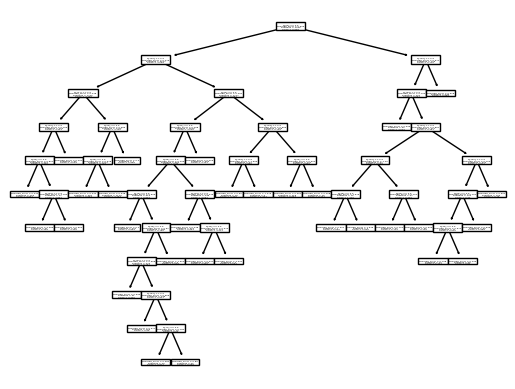

In [42]:
tr = DecisionTreeRegressor(ccp_alpha=0.002)
test_model(tr)
plot_tree(tr)

on train set: RMSE, MAE, R2 = 0.16337214442079173, 0.04428051395732711, 0.9494493393328047
on test set: RMSE, MAE, R2 = 0.628622440378699, 0.40945231126435766, 0.2809193931019893


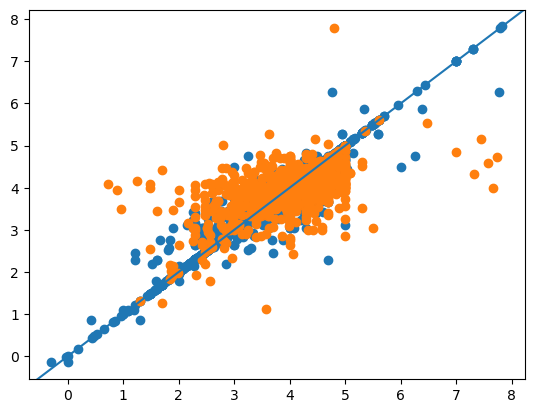

In [59]:
model = KNeighborsRegressor(n_neighbors=7, weights='distance', metric='l1')
test_model(model)